In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('/content/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
df.shape

(200, 4)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
df.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
print("Missing Values for each column: ")
print(df.isnull().sum())

Missing Values for each column: 
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


# Checking for duplicate values

In [14]:
df.duplicated().sum()

0

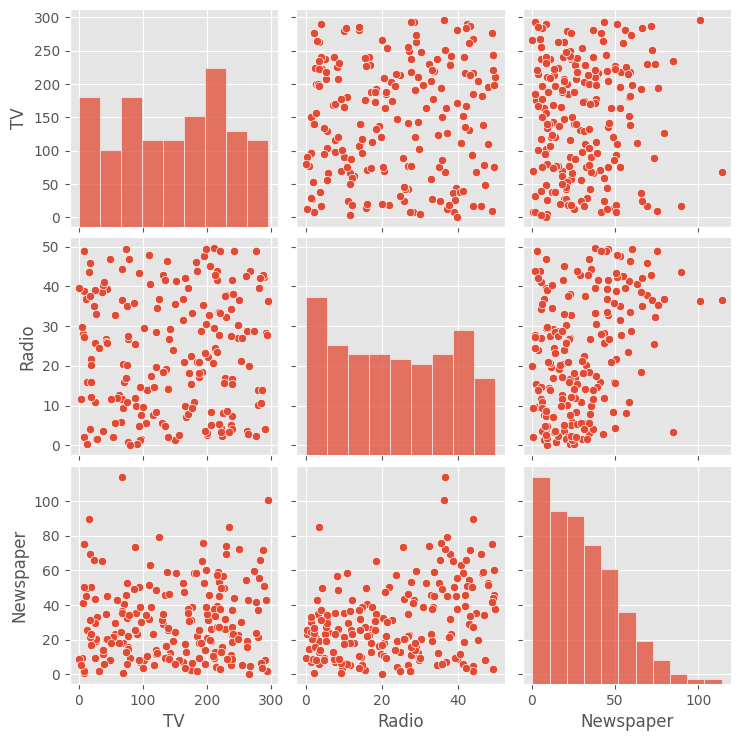

In [16]:
sns.pairplot(df,vars=["TV","Radio","Newspaper"])
plt.show()

In [17]:
df_corr=df.corr()

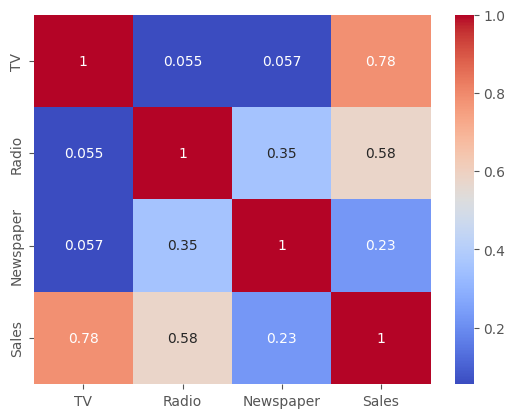

In [18]:
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [21]:
X=df.drop(['Sales'],axis=1)
y=df['Sales']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred=model.predict(X_test)

In [26]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [28]:
mse

3.1740973539761033

In [27]:
r2

0.899438024100912

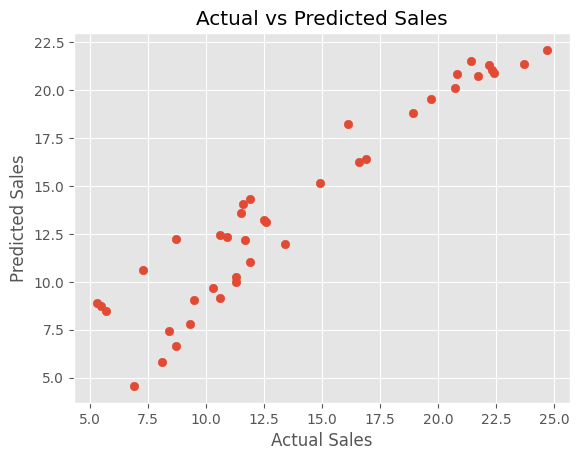

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()